![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **Random Forest Aufgabe**
    - **Aufgabe 1: Import Data**
    - **Aufgabe 2: Explorative Daten Analyse**
    - **Aufgabe 3: Preprocessing**
    - **Aufgabe 4: Random Forest Classifier mit 100 Estimators**
    - **Aufgabe 5: Ergebnis vom 100-RFC**
    - **Aufgabe 6: Random Forest Classifier mit 1000 Estimators**
    - **Aufgabe 7: Ergebnis vom 1000-RFC**
    - **Aufgabe 8: Confusion Matrix**
    - **Aufgabe 9: Feauture Importance**
    - **Aufgabe 10: Visualisierung eines Baums**
    - **Aufgabe 11: Random Forest Classifier mit 1000 Estimators und Depth 2**
    - **Aufgabe 12: Ergebnis vom 1000-2-RFC**
    - **Aufgabe 13: Visualisierung eines Baums**


# Random Forest Aufgabe

## Aufgabe 1: Import Data

Wir werden unser Random Forest Modell auf den Datensatz [Car Evaluation Data Set](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) testen lassen. Wie du merken wirst, sind alle Spalten des Datensatzes als Strings codiert, z.B. nimmt das Feature `doors` den Wert `5more` an. Damit wir unseren Algorithmus reibungslos anwenden können, haben wir die Daten schon zu Integers codiert. 

- Lade die `csv` Datei aus dem Mitgliederbereich auf deinen Computer.
- Mache dich mit den Daten vertraut.
- Importiere die Daten in ein [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

Importiere zuerst die nötigen Bibliotheken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Schreibe dein Code hier

df = pd.read_csv("car_evaluation_enc.csv")
# Schreibe dein Code hier

## Aufgabe 2: Explorative Daten Analyse

Bekomme ein Gefühl für die Daten, indem du Funktionen zur explorativen Datenanalyse aufrufst:

- [`df.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`df.sample(n=10)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)
- [`df.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- [`df.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`df[c].value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) für jede Spalte `c`.

- Was zeigen die einzelnen Ergebnisse an?

In [3]:
# Schreibe dein Code hier

df.head()
# Schreibe dein Code hier

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [4]:
# Schreibe dein Code hier

df.sample(n=10)

# Schreibe dein Code hier

,buying,maint,doors,persons,lug_boot,safety,class
1678,0,0,2,0,1,1,0
1181,1,1,3,2,0,2,1
519,2,3,3,0,2,0,0
651,2,1,0,0,1,0,0
1378,0,3,3,0,0,1,0
24,3,3,0,2,2,0,0
942,1,3,2,2,2,0,0
420,3,0,3,1,2,0,0
1726,0,0,3,2,2,1,2
1594,0,1,3,0,0,1,0


In [5]:
# Schreibe dein Code hier

df.describe()

# Schreibe dein Code hier

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [6]:
# Schreibe dein Code hier

df.info()

# Schreibe dein Code hier

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 108.0 KB


In [7]:
# Schreibe dein Code hier

for c in df.columns:
    result = df[c].value_counts()
    print(f"Value counts for column '{c}':\n{result}\n")

# Schreibe dein Code hier

Value counts for column 'buying':
buying
3    432
2    432
1    432
0    432
Name: count, dtype: int64

Value counts for column 'maint':
maint
3    432
2    432
1    432
0    432
Name: count, dtype: int64

Value counts for column 'doors':
doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64

Value counts for column 'persons':
persons
0    576
1    576
2    576
Name: count, dtype: int64

Value counts for column 'lug_boot':
lug_boot
0    576
1    576
2    576
Name: count, dtype: int64

Value counts for column 'safety':
safety
0    576
1    576
2    576
Name: count, dtype: int64

Value counts for column 'class':
class
0    1210
1     384
2      69
3      65
Name: count, dtype: int64



## Aufgabe 3: Preprocessing

Wie schon öfters gesehen, wollen wir unseren Datensatz aufteilen in die (_reinen_) Daten `X` und das Label (*Target*) `y`.

- Erstelle ein DataFrame `X` aus `df` _ohne_ das Feature `class`.
- Erstelle ein Series `y` aus dem Feature `class` von `df`.

Nun wollen wir `X` und `y` in Trainings- und Testdaten aufteilen.

- Rufe die [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) Funktion mit einem Testanteil von ⅓ auf.
- Verifiziere die Ergebnisse mit dem `shape` Attribut der DataFrames.

In [8]:
# Schreibe dein Code hier

X = df.drop(columns=['class'],axis=1)
y = df['class']

print(X.shape)
print(y.shape)




# Schreibe dein Code hier

(1728, 6)
(1728,)


In [9]:
# Schreibe dein Code hier

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=10)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

# Schreibe dein Code hier

(1157, 6)
(1157,)
(571, 6)
(571,)


## Aufgabe 4: Random Forest Classifier mit 100 Estimators

- Erstelle nun einen [**Random Forest Classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (RFC) mit 100 Entscheidungsbäumen.
- Trainiere das Modell mit der [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Samples der Testdaten vorher.

In [10]:
# Schreibe dein Code hier

rfc = RandomForestClassifier(random_state=1) ## Da Standardwert für n_estimators = 100

rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

predictions
# Schreibe dein Code hier

array([0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 3, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 3, 3, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

## Aufgabe 5: Ergebnis vom 100-RFC

- Teste die Performance des trainierten Modelles durch [`accuracy score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) und [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).
- Sind die Vorhersagen aussagekräftig?

In [11]:
# Schreibe dein Code hier

print("Genauigkeit: {:.2f}%".format(accuracy_score(predictions,y_test)*100))
print("Mittlere absolute Abweichung: {:.2f}".format(mean_absolute_error(predictions, y_test)))

# Schreibe dein Code hier

Genauigkeit: 96.85%
Mittlere absolute Abweichung: 0.04


## Aufgabe 6: Random Forest Classifier mit 1000 Estimators

- Erstelle nun einen Random Forest Classifier mit **1000 Entscheidungsbäumen**.
- Trainiere das Modell mit der `fit` Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Testdaten vorher.

In [12]:
# Schreibe dein Code hier



rfc2 = RandomForestClassifier(random_state=2, n_estimators=1000) ## Da Standardwert für n_estimators = 100
rfc2.fit(X_train,y_train)
predictions = rfc2.predict(X_test)

predictions


# Schreibe dein Code hier

array([0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 3, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 3, 3, 1, 1,
       1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

## Aufgabe 7: Ergebnis vom 1000-RFC

- Teste die Ergebnisse des trainierten Modelles durch `accuracy score` und `mean_absolute_error`.
- Vergleiche die Werte mit dem 100-RFC. Sind die Vorhersagen besser?

In [13]:
# Schreibe dein Code hier

print("Genauigkeit: {:.2f}%".format(accuracy_score(predictions,y_test)*100))
print("Mittlere absolute Abweichung: {:.2f}".format(mean_absolute_error(predictions, y_test)))

## Ja, sie wurden noch einmal minimal besser.


# Schreibe dein Code hier

Genauigkeit: 97.55%
Mittlere absolute Abweichung: 0.03


## Aufgabe 8: Confusion Matrix

- Erstelle und interpretiere die [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) für die Testsamples und deren Vorhersagen. 

In [14]:
# Schreibe dein Code hier

print(confusion_matrix(y_test,predictions))

## Klasse 0 wurde 407 korrekt vorhergesagt mit 5 Fehlern als Klasse 1
## Klasse 1 wurde 109 mal korrekt vorhergesagt mit 1 Fehler als Klasse 0 und 2 Fehler als Klasse 2
## Klasse 2 wurde 20 mal korrekt vorhergesagt mit 1 Fehler als Klasse 3
## Klasse 3 wurde 21 mal korrekt vorhergesagt mit 5 Fehlern als Klasse 1
# Schreibe dein Code hier

[[407   5   0   0]
 [  1 109   2   0]
 [  0   0  20   1]
 [  0   5   0  21]]


## Aufgabe 9: Feauture Importance

Das Attribut [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) enthält weitere wichtige Informationen, um unser Modell zu verbessern.

- Erstelle ein Series mit den Werten der `feature_importances_` und dem Spaltennamen als Index.
- Sortiere die Series und interpretiere die Ergebnisse.
- Welche Features sind am wichtigsten für die Klassifizierung?

In [15]:
# Schreibe dein Code hier

fi = pd.Series(rfc.feature_importances_, index=X.columns)
fi_sort = fi.sort_values(ascending=False)

fi_sort

## Safety und persons scheinen die wichtigsten Features zu sein
# Schreibe dein Code hier

safety      0.303103
persons     0.243821
maint       0.158866
buying      0.145638
lug_boot    0.085730
doors       0.062842
dtype: float64

## Aufgabe 10: Visualisierung eines Baums

Visualisiere einen zufälligen Baum aus einem der `Random Forest` mit der Funktion [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).


In [18]:
import sklearn
sklearn.__version__

'1.3.0'

Text(0.5, 1.0, 'Baum 13 des Random Forests')

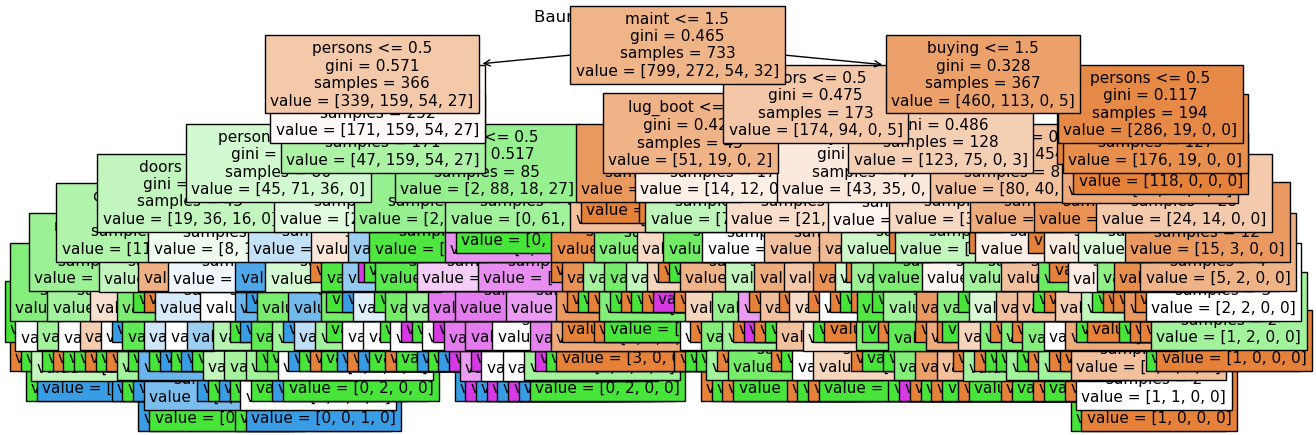

In [21]:
# Visualisierung des 12ten Baums


number_of_tree = 13
plt.figure(figsize=(15,5))
plot_tree(rfc2.estimators_[number_of_tree], filled=True, feature_names=list(X.columns), fontsize=11)   

plt.title(f"Baum {number_of_tree} des Random Forests")

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

## Aufgabe 11: Random Forest Classifier mit 1000 Estimators und Depth 2

Der Baum ist sehr tief. Um eine einfachere Visualisierung zu schaffen, testen wir schließlich einen RFC mit 1000 Entscheidungsbäumen, aber nur eine Tiefe von 2.

- Erstelle einen neuen Random Forest Classifier mit **1000 Entscheidungsbäumen** und einer **Tiefe von 2**.
- Trainiere das Modell mit der `fit` Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Testdaten vorher.

In [24]:
# Schreibe dein Code hier

rfc3 = RandomForestClassifier(random_state=3, n_estimators=1000, max_depth= 2) ## Da Standardwert für n_estimators = 100
rfc3.fit(X_train,y_train)
predictions = rfc3.predict(X_test)

predictions



# Schreibe dein Code hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Aufgabe 12: Ergebnis vom 1000-2-RFC

- Teste die Ergebnisse des trainierten Modelles durch `accuracy score` und `mean_absolute_error`.
- Was ändert sich durch die neue Tiefe der Bäume?

In [33]:
# Schreibe dein Code hier

print("Genauigkeit: {:.2f}%".format(accuracy_score(predictions,y_test)*100))
print("Mittlere absolute Abweichung: {:.2f}".format(mean_absolute_error(predictions, y_test)))

# Schreibe dein Code hier

Genauigkeit: 72.15%
Mittlere absolute Abweichung: 0.41


Das Modell sollte ca. $70\% Accuracy$ haben, also immer noch ok. Ist das aber wirklich so? Benutze `print()` um `y_pred` anzuzeigen.

In [26]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

1. Was erkennt man an der Liste von Vorhersagen? Was fällt dir auf?
2. Was sagt uns die $Accuracy$ über das Modell aus? Wieso ist die $Accuracy$ so hoch? Ist sie die geeignete Metrik für das Modell? Die Funktion `unique, counts = numpy.unique(array, return_counts=True)` kann helfen, zu verstehen, was hier passiert
3. Benutze den [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) um zusätzlich $precision, recall, F1$ auszugeben. Was fällt dir auf?

In [32]:
# Schreibe dein Code hier

## Alle Vorhersagen sind Klasse . 

unique, counts = np.unique(predictions, return_counts=True)
print(classification_report(y_test,predictions))

## Klasse 0 kommt einfach überproportional häufiger vor.
# Schreibe dein Code hier

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       412
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        26

    accuracy                           0.72       571
   macro avg       0.18      0.25      0.21       571
weighted avg       0.52      0.72      0.60       571



D:\Users\janni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\janni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\janni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Aufgabe 13: Visualisierung eines Baums

Visualisiere einen zufälligen Baum aus dem neuen `Random Forest` (mit Tiefe 2). Nun sollte sich klarer erkennen lassen, welche Entscheidungen der Baum trifft. 

- Interpretiere die Visualisierung.

Text(0.5, 1.0, 'Baum 13 des Random Forests')

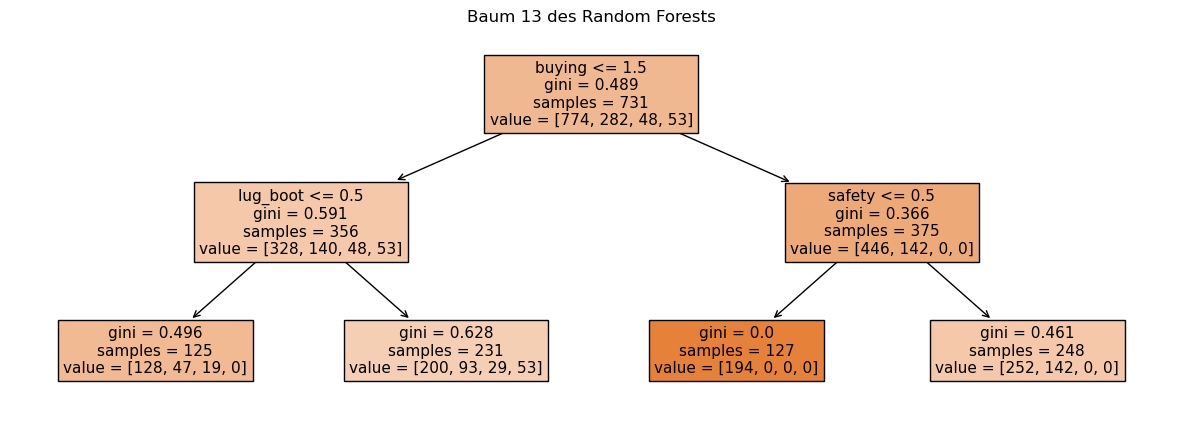

In [25]:
# Schreibe dein Code hier

number_of_tree = 13
plt.figure(figsize=(15,5))
plot_tree(rfc3.estimators_[number_of_tree], max_depth=2, filled=True, feature_names=list(X.columns), fontsize=11)   

plt.title(f"Baum {number_of_tree} des Random Forests")

# Schreibe dein Code hier